In [2]:
# COVID-19 Global Data Tracker

#  Project Description:
# This notebook tracks and analyzes global COVID-19 trends such as total cases, deaths, and vaccinations.
# Data Source: Our World in Data (OWID)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# ==========================
#  1. Load the COVID-19 Dataset
# ==========================

url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
try:
    covid_df = pd.read_csv(url)
    print("Data loaded successfully")
except Exception as e:
    print("Error loading data:", e)

# Display basic structure
covid_df.head()

Data loaded successfully


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:
# ==========================
# 🧹 2. Data Cleaning
# ==========================

covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df = covid_df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'people_vaccinated']]
covid_df.fillna(0, inplace=True)

C:\Users\ErickOndiwa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ErickOndiwa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ErickOndiwa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


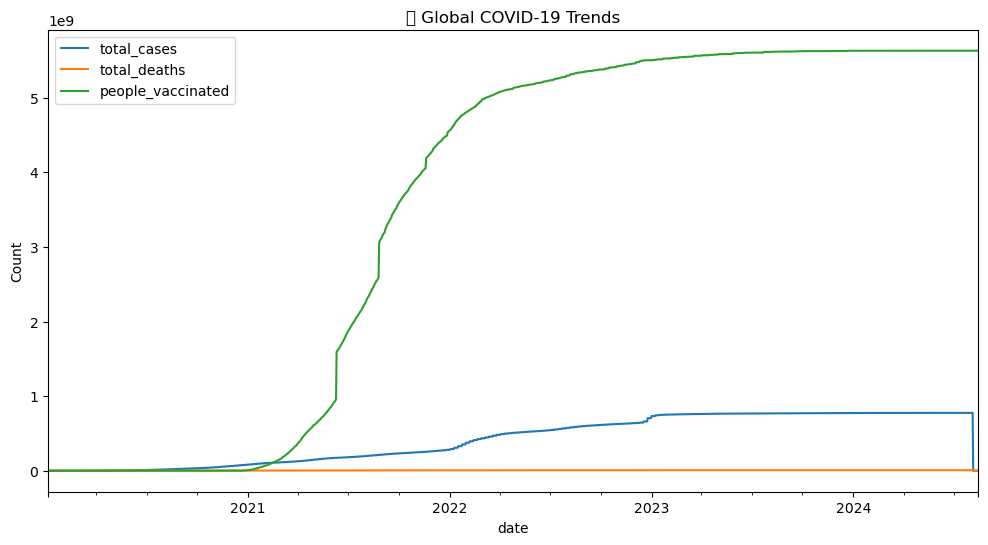

C:\Users\ErickOndiwa\AppData\Local\Temp\ipykernel_10452\1422026887.py:20: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

C:\Users\ErickOndiwa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


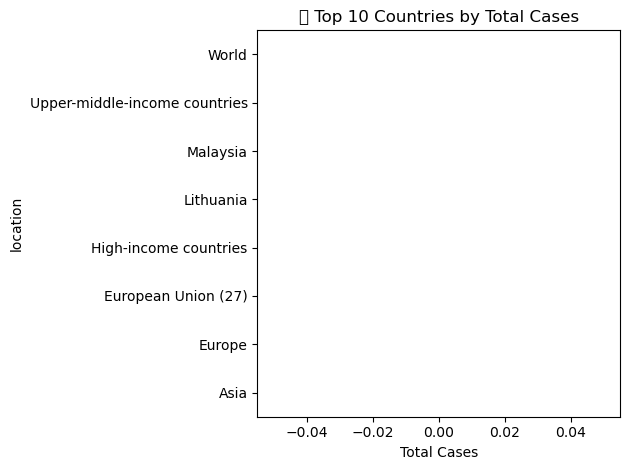

In [6]:
# ==========================
# 📊 3. Exploratory Data Analysis
# ==========================

# Global trends
global_df = covid_df[covid_df['location'] == 'World']
global_df.set_index('date')[['total_cases', 'total_deaths', 'people_vaccinated']].plot(
    figsize=(12, 6), title='🌍 Global COVID-19 Trends')
plt.ylabel('Count')
plt.show()

# Top 10 countries by total cases
latest = covid_df[covid_df['date'] == covid_df['date'].max()]
top10 = latest.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(10, 6))
top10.plot(kind='barh', x='location', y='total_cases', legend=False)
plt.title('🔝 Top 10 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.tight_layout()
plt.show()

C:\Users\ErickOndiwa\AppData\Local\Temp\ipykernel_10452\90855222.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\ErickOndiwa\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


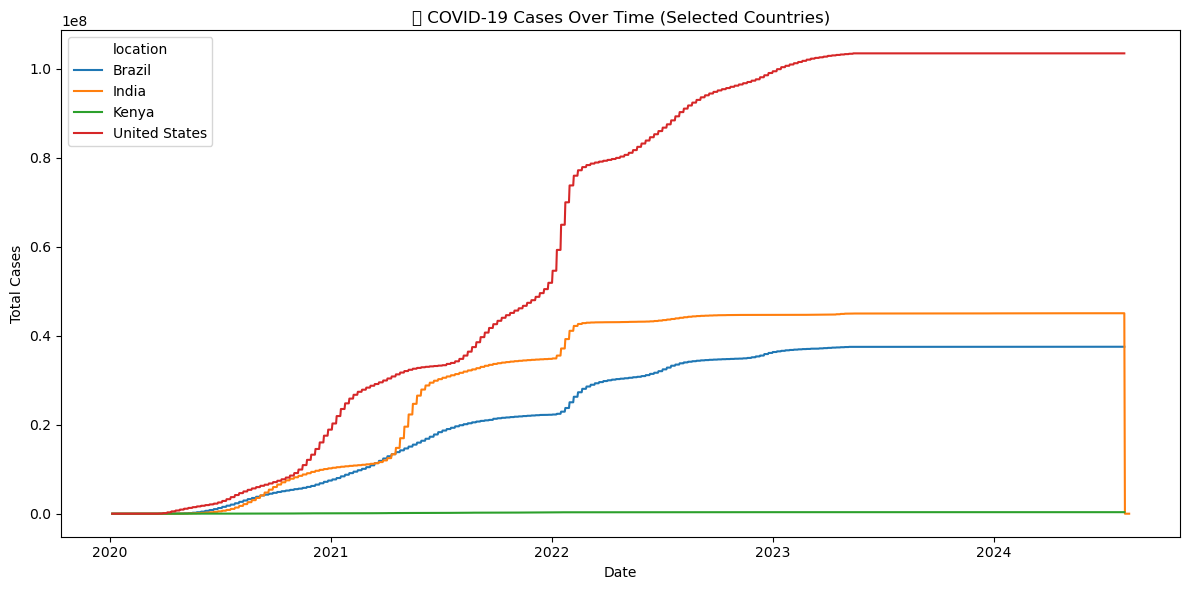

In [8]:
# ==========================
# 📌 4. Comparative Analysis by Country
# ==========================

selected_countries = ['Kenya', 'India', 'United States', 'Brazil']
country_subset = covid_df[covid_df['location'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=country_subset, x='date', y='total_cases', hue='location')
plt.title('📈 COVID-19 Cases Over Time (Selected Countries)')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

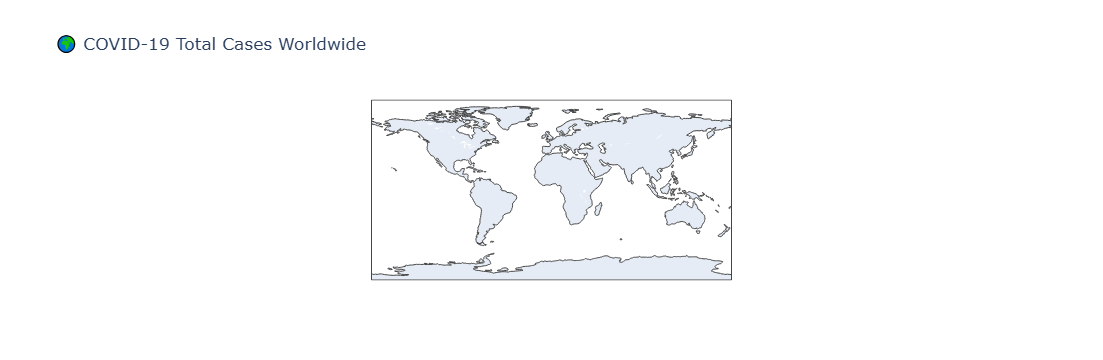

In [11]:
# ==========================
# 🗺️ 5. Global Map Visualization
# ==========================

map_data = latest[latest['total_cases'] > 10000]
fig = px.choropleth(map_data, locations='location', locationmode='country names',
                    color='total_cases', hover_name='location',
                    color_continuous_scale='Reds',
                    title='🌍 COVID-19 Total Cases Worldwide')
fig.show()

In [ ]:
# ==========================
# 📝 6. Summary
# ==========================

# - The global number of cases and vaccinations continues to rise.
# - The US, India, and Brazil are among the most affected countries.
# - Some countries show effective vaccination programs.
# - Visualization helps track global health crises and supports informed policy-making.

# ✅ Project complete!
